In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.src.layers import Embedding, SimpleRNN, Dense, Flatten
from keras import Sequential

## Данные из архива погоды. Санкт-Петербург

In [138]:
df = pd.read_csv('data.csv', sep=';')
print(df.head())
series_analise =  df['Максимальная  температура'] 
series_analise_date = df['Дата']


         Дата  Максимальная  температура  Минимальная  температура  \
0  07.12.1990                        3.7                      -4.5   
1  08.12.1990                        3.4                       0.9   
2  09.12.1990                        0.6                      -0.8   
3  10.12.1990                       -0.4                      -3.7   
4  11.12.1990                       -1.6                      -4.1   

   Средняя  температура  Атмосферное  давление  Скорость  ветра  Осадки  \
0                   1.2                 1008.0                5     0.0   
1                   2.3                 1016.1                3     3.0   
2                  -0.3                 1023.5                1     1.0   
3                  -2.7                 1023.7                2     0.0   
4                  -2.9                 1015.4                3     1.0   

   Эффективная  температура  
0                      -3.5  
1                      -1.0  
2                      -2.6  
3       

# Вычисление среднего за определенное количество периодов

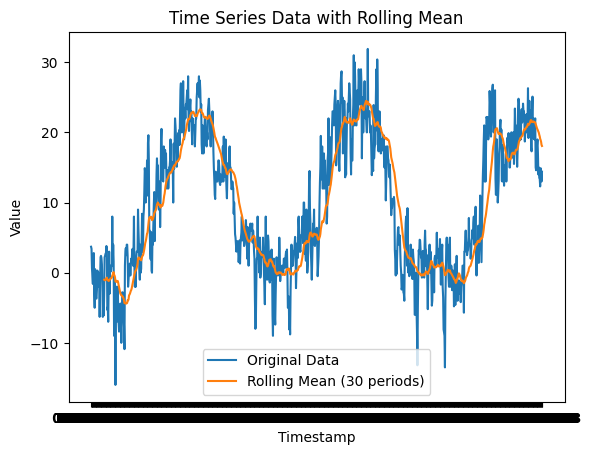

In [139]:

window_size = 30  # количество прошлых периодов
rolling_mean = series_analise.rolling(window=window_size).mean()

plt.plot(series_analise_date, series_analise, label='Original Data')
plt.plot(series_analise_date, rolling_mean, label=f'Rolling Mean ({window_size} periods)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series Data with Rolling Mean')
plt.legend()
plt.show()


# Linear 

In [140]:
from sklearn.model_selection import train_test_split
import numpy as np 

feature = pd.to_datetime(series_analise_date, format='%d.%m.%Y').astype(int) // 10**9 # переводим в секунды

X_train, X_test, y_train, y_test = train_test_split(np.array(series_analise).reshape(-1, 1), np.array(feature), test_size=0.2, random_state=42)
X_train # температуры


array([[ -3.2],
       [ 23. ],
       [  2.2],
       [ 25. ],
       [  4.4],
       [ 24. ],
       [ 15. ],
       [ 14. ],
       [  4. ],
       [  1. ],
       [ -4.4],
       [  4.5],
       [ 19.9],
       [  3. ],
       [ 18. ],
       [  4. ],
       [ 11. ],
       [ 17. ],
       [ 21.8],
       [  4. ],
       [ 14.4],
       [  2. ],
       [ 17.8],
       [  4. ],
       [ 13.4],
       [  0.6],
       [ 19. ],
       [  4. ],
       [ 17. ],
       [ 23. ],
       [  6.1],
       [ 13.4],
       [  3. ],
       [ 17. ],
       [  2.8],
       [  2.4],
       [ 20. ],
       [ 22.4],
       [ 15.9],
       [  5.7],
       [ -0.4],
       [ 27.3],
       [ 12. ],
       [  0. ],
       [ 17.4],
       [  4. ],
       [  0.7],
       [  3.5],
       [  0. ],
       [ 12.5],
       [ -2. ],
       [ 14. ],
       [  3. ],
       [ 25. ],
       [  3. ],
       [  4.4],
       [ 14. ],
       [ 15.3],
       [ 19.2],
       [  2.7],
       [  2.1],
       [  5. ],
       [

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()  

model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('R^2:', r2_score(y_test, predictions))



MAE: 20631080.325170826
MSE: 586048949669646.1
R^2: 0.03945042625698858


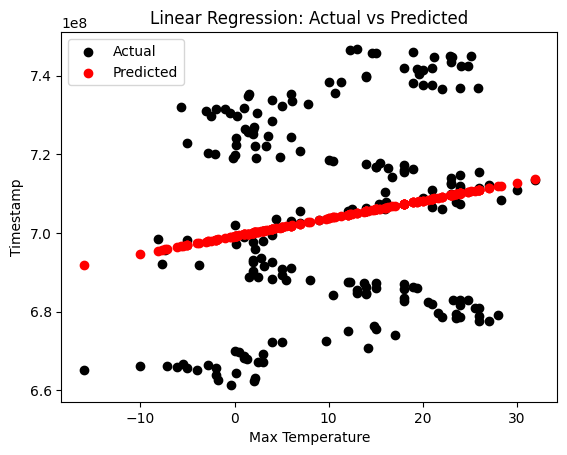

In [142]:
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.xlabel('Max Temperature')
plt.ylabel('Timestamp')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

# Random Forest

In [143]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()  

model.fit(X_train, y_train)
predictions = model.predict(X_test)

print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('R^2:', r2_score(y_test, predictions))




MAE: 22497102.317485142
MSE: 728776792682713.6
R^2: -0.19448424565862976


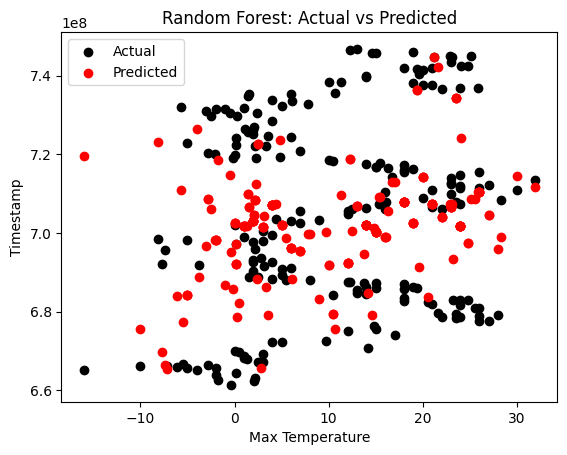

In [144]:
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.xlabel('Max Temperature')
plt.ylabel('Timestamp')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()
plt.show()

# MLP

In [145]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

/home/andrew/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


array([ 624741.44620562,   93688.02209375,  335879.2974011 ,
        721028.82914045,  152933.26982491,  157747.63897165,
       1197651.3746679 ,  624741.44620562,  114418.31665097,
        287735.60593368,   93304.21832841,  191448.22299884,
        913603.59501013, 1159136.42149397,  981004.76306452,
        961747.28647755,  672885.13767303, 1293938.75760274,
        143304.53153142,  311807.45166739,  822130.58122203,
        769172.52060787,  239591.91446626,  648813.29193933,
       1202465.74381465, 1298753.12674948,  191448.22299884,
        749915.04402091,  591040.86217842, 1240980.69698858,
        143304.53153142,  514010.95583055,  851016.79610249,
        258849.39105323,  143304.53153142, 1298753.12674949,
         93624.05479953, 1491327.89261916,  528454.06327078,
        141840.22469441,  167376.37726513,   95650.23115383,
        624741.44620562, 1067663.40770587,  721028.82914045,
        721028.82914045,  990633.501358  , 1154322.05234723,
        431614.73769808,

In [146]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('R^2:', r2_score(y_test, predictions))

MAE: 703785331.2886758
MSE: 4.959212887770967e+17
R^2: -811.8279776176478


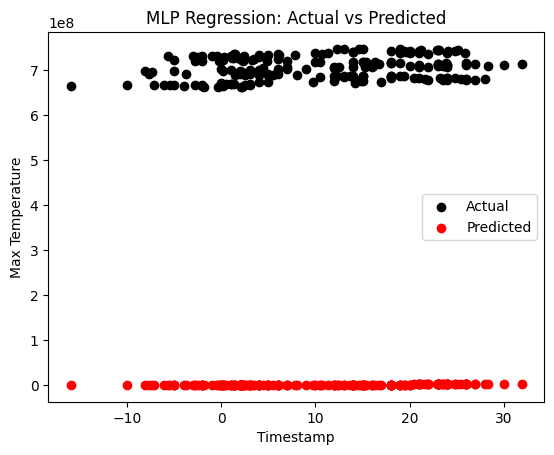

In [147]:
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Max Temperature')
plt.title('MLP Regression: Actual vs Predicted')
plt.legend()
plt.show()

# LSTM

In [152]:
from sklearn.preprocessing import MinMaxScaler
from keras.src.layers import  LSTM, GRU

y = feature.values.reshape(-1, 1)
X = series_analise.values.reshape(-1, 1)

scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# преобразование данных в формат для LSTM
def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps + 1):
        v = X[i:(i + time_steps), 0]
        Xs.append(v)
        ys.append(y[i + time_steps - 1, 0])
    return np.array(Xs), np.array(ys)

time_steps = 250
n_features = 1 


X_train_lstm, y_train_lstm = create_dataset(X_train, y_train, time_steps)
print(X_train_lstm.shape, y_train_lstm.shape)
print(X_test.shape, y_test.shape)
X_test_lstm, y_test_lstm = create_dataset(X_test, y_test, time_steps)
print(X_test_lstm.shape, y_test_lstm.shape)



(451, 250) (451,)
(300, 1) (300, 1)
(51, 250) (51,)


In [153]:

model = Sequential()
model.add(LSTM(units=800, input_shape=(time_steps, n_features)))
model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_lstm, y_train_lstm, epochs=15, verbose=1)


Epoch 1/15
15/15 [==============================] - 13s 779ms/step - loss: 0.0873
Epoch 2/15
15/15 [==============================] - 12s 768ms/step - loss: 0.0847
Epoch 3/15
15/15 [==============================] - 12s 812ms/step - loss: 0.0852
Epoch 4/15
15/15 [==============================] - 12s 779ms/step - loss: 0.0850
Epoch 5/15
15/15 [==============================] - 12s 788ms/step - loss: 0.0848
Epoch 6/15
15/15 [==============================] - 12s 788ms/step - loss: 0.0847
Epoch 7/15
15/15 [==============================] - 12s 782ms/step - loss: 0.0849
Epoch 8/15
15/15 [==============================] - 12s 789ms/step - loss: 0.0847
Epoch 9/15
15/15 [==============================] - 12s 792ms/step - loss: 0.0849
Epoch 10/15
15/15 [==============================] - 12s 800ms/step - loss: 0.0846
Epoch 11/15
15/15 [==============================] - 12s 792ms/step - loss: 0.0849
Epoch 12/15
15/15 [==============================] - 11s 756ms/step - loss: 0.0847
Epoch 13/15
1

In [154]:
predictions_scaled = model.predict(X_test_lstm)
predictions = scaler_y.inverse_transform(predictions_scaled)
y_test_inv = scaler_y.inverse_transform(y_test_lstm.reshape(-1, 1))

print('MAE:', mean_absolute_error(y_test_inv, predictions))
print('MSE:', mean_squared_error(y_test_inv, predictions))
print('R^2:', r2_score(y_test_inv, predictions))

2/2 [==============================] - 1s 76ms/step
MAE: 21737582.43137254
MSE: 638870885209107.8
R^2: 0.00027783729326336104


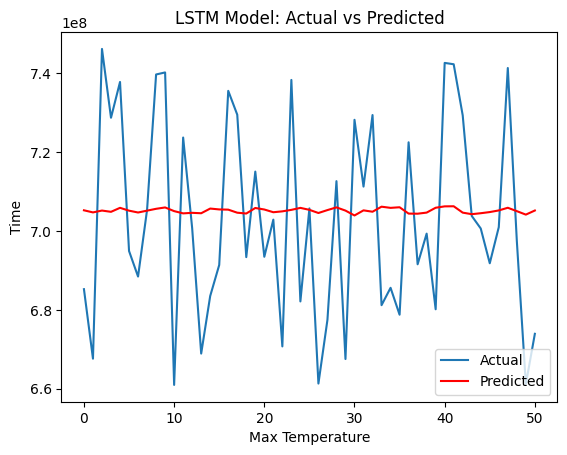

In [156]:


plt.plot(y_test_inv, label='Actual')
plt.plot(predictions, label='Predicted', color='red')
plt.xlabel('Max Temperature')
plt.ylabel('Time')
plt.title('LSTM Model: Actual vs Predicted')
plt.legend()
plt.show()

